# Reflectancia difusa de un tejido biológico


## Reflectancia difusa para la detección de tejidos tumorales

La espectroscopía de reflectancia difusa permite obtener información relevante de muestras biológicas de forma no invasiva. La idea básica se muestra en la Fig.1. Se envía un haz de luz de cierto contenido espectral, por ejemplo, luz blanca, y se analiza la luz retrodifundida por el tejido.

<img src="figestudio_1.png" style="max-width:100%" />

Se obtiene así un espectro de reflectancia $R(\lambda)=I_R(\lambda)/I_0(\lambda)$, donde $I_0(\lambda)$ e $I_R(\lambda)$ representan la intensidad incidente y reflejada difusa, respectivamente. Nos referimos a esta reflectancia como reflectancia difusa debido a que la luz o radiación que emerge del tejido ha experimentado muchos eventos de absorción y scattering por las moléculas y estructuras celulares que constituyen el mismo. En su camino cada fotón del haz incidente se desviará de su trayectoria y será parcial o totalmente absorbido dependiendo de su longitud de onda en relación con las bandas de absorción de las moléculas del tejido. Los cambios experimentados por las diferentes componentes espectrales de la luz incidente llevarán información del tipo y de la concentración de moléculas en el tejido y de los tamaños de las estructuras que lo componen, dado que  estas estructuras detrminan el grado de scattering en el medio.  Los principales absorbentes en los tejidos biológicos en el visible don la oxihemoglobina y deoxoxihemoglobina, el beta-caroteno, la melanina. En el IR, el agua y los lípidos. El scattering está producido fundamentalmente por las fibras de colágeno y las organelas subcelulares.

El montaje típico se muestra en la figura: una fuente de luz blanca ilumina un mazo de fibras  compuesta de una fibra centrar que transporta la radiación hasta el tejido,


<img src="figestudio_2.png" style="max-width:100%" />

La teoría de la difusión establece que reflectancia difusa captada por la fibra vienen dada por

$$R_D(r,z_0) = R_0\left[\frac{z_0(1+\mu_e\rho_1)}{4\pi\rho_1^3}e^{-\mu_e \rho_1} + \frac{(z_0 + 4D)(1+\mu_e \rho_2)}{4\pi \rho_2^3}e^{-\mu_e \rho_2}\right]$$ 

donde, 


$$\mu_e = \sqrt{3\mu_a (\mu_a + \mu_s')},$$
$$\mu_s' = \mu_s (1 -g),$$
$$z_0 = \frac{1}{\mu_a + \mu_s'},$$
$$D = \frac{z_0}{3},$$
$$\rho_1 = \sqrt{z_0^2 + r^2} , \;\;\; \rho_2 = \sqrt{(z_0 + 4D)^2 + r^2}$$



### Modelo de absorcion del tejido

Se considera que los cromoforos mas relevantes son la sangre (Hemoglobina + Oxihemoglobina) y el agua. Los coeficientes de absorcion lineal (en cm$^{-1}$) de la hemoglobina, oxihemoglobina y agua se dan en los ficheros `mua_Hemo.dat`, `mua_Oxy.dat` y `mua_Agua.dat` respectivamente. El coeficiente de absorcion del tejido se puede representar como sigue:

$$\mu_a^{tejido}(\lambda) = \sum_j f_j \mu_{a,j}(\lambda),$$

donde $f_j$ son las fracciones en volumen de cada cromoforo.


<img src="figestudio_3.png" style="max-width:100%" />

### Modelo de scattering en la piel

En cuanto al scattering, asumiremos un modelo empirico que mezcla scattering Rayleigh y scattering Mie,


$$\mu_s' = \mu_{500} \left[f_R \frac{1}{\left(\frac{\lambda}{500}\right)^4} + (1 -f_R)\frac{1}{\left(\frac{\lambda}{500}\right)^b}\right],$$

donde $f_R$ representa la fraccion de scattering debido al scattering Rayleigh y $\mu_{500}$ es una constante cuyo significado se debera especificar. La constante $b$ se denomina *pendiente de Mie*. La longitud de onda se ha de introducir en nm.


Vamos a continuacion a calcular la reflectancia difusa para un caso particular.
Los coeficientes de las fracciones en volumen de los cromoforos y los valores del resto de parametros se dan en la siguiente tabla. La separacion entre la fibra emisora y la fibra colectora la tomaremos como $r = 400 \mu$m.

<table>
        <tr>
            <th colspan="2" style="background-color=
#a6ce4c;">Scattering</th>
            <th  colspan="6" style="background-color=#b9d4fb;">Absorción</th>
        </tr>
       <tr>
    <td style="background-color=#a6ce4c;">$\mu$500</td>
     <td>b</td>  
     <td>f$_R$</td>
     <td>f$_s$</td>
      <td>f$_a$</td>
      <td>Mel</td>
      <td>R$_0$</td>
    </tr>
    <tr>    
    <td style="background-color=#a6ce4c;">45</td>
    <td>0.89</td>  
    <td>0.05</td>
    <td>0.98</td>
    <td>0.65</td>
    <td>0.003</td>
    <td>0.02</td>
  </tr>  
</table>
        
    







* f$_s$: fraccion en volumen de la sangre.
* S: fraccion de oxigeno en sangre.
* f$_a$: fraccion en volumen del agua.
* b: pendiente de Mie
* f_R: fraccion de scattering Rayleigh



El siguiente programa representa los coeficientes de absorción lineal de los cromóforos relevantes de la piel.

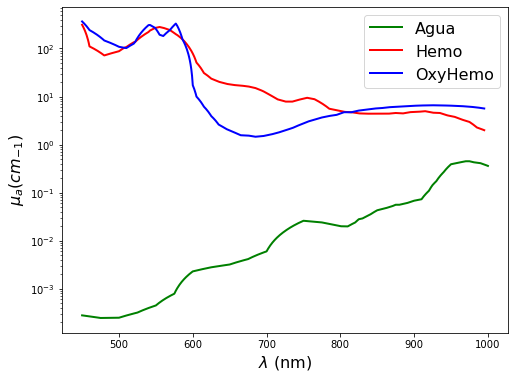

In [1]:
# ######################################################################## 
# El programa representa los coeficientes de absorción lineal del agua, 
# hemoglobina y oxihemoglobina-----------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#-------------------------------------------------------------------------- A=np.loadtxt('mua_Agua.dat'); 
A=np.loadtxt('mua_Agua.dat');
landas_0 = A[:,0]
mua_Agua=A[:,1]
B=np.loadtxt('mua_Hemo.dat'); 
#landas_0 = B(:,1);
mua_Hemo=B[:,1]
C=np.loadtxt('mua_Oxy.dat'); 
#landas_0 = A(:,1);
mua_Oxy=C[:,1]
#----------------------------------------------------

#-------- Figuras-------------------------------------
fig = plt.figure(figsize=(8,6))
plt.semilogy(landas_0, mua_Agua,'g', landas_0, mua_Hemo,'r',landas_0, mua_Oxy,'b', linewidth=2)
plt.xlabel('$\lambda$ (nm)',fontsize=16);
plt.ylabel('$\mu_a (cm_{-1})$',fontsize=16);
plt.legend(('Agua', 'Hemo', 'OxyHemo'),fontsize=16);
#-----

Vamos a representar a continuacion la reflectancia difusa predicha por el modelo teorico expuesto anteriormente para el caso considerado en la tabla. Para ello debemos considerar que el coeficiente de absorción se puede expresar, 

$$\mu_a(\lambda) = f_s\left[ S\mu_a^{ox}(\lambda) + (1-S)\mu_a^{hem}(\lambda) \right]+ f_a\mu_a^{agua}(\lambda)$$

mientras que el coeficiente de scattering viene dado por la siguiente expresión, 

$$\mu_s' = \mu_{500}\left[f_R \frac{1}{\left(\frac{\lambda}{500}\right)^4} + (1 -f_R) \frac{1}{\left(\frac{\lambda}{500} \right)^b}\right]$$

En resumen, 

<img src="figestudio_4.png" style="max-width:100%" />

(0.0, 1.0)

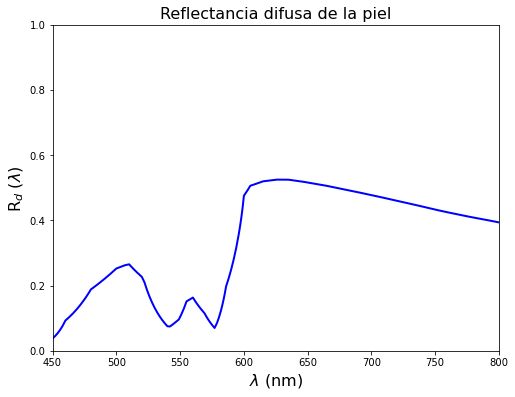

In [2]:
# ######################################################################## 
#  El programa representa la reflectancia difusa a partir de la 
# expresión predicha por la teoría de la difusión
#--------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#-------------------------------------------------------------------------- A=load('mua_Agua.dat') 
A=np.loadtxt('mua_Agua.dat')
landas_0 = A[:,0]
mua_Agua=A[:,1]
B=np.loadtxt('mua_Hemo.dat') 
#landas_0 = A(:,1)
mua_Hemo=B[:,1]
C=np.loadtxt('mua_Oxy.dat') 
#landas_0 = A(:,1)
mua_Oxy=C[:,1]
mua_Mel = 6.6e11*landas_0**(-3.33)
#-----------------------------------------------------
  
    
#---------------REFLECTANCIA DE LA DERMIS---------------------------------------

#------COEFICIENTE DE SCATTERING MIE+RAYLEIGH--------------------
mu500=45 # cm-1
fR=0.4
b= 0.89
musp = mu500*(fR*1/(landas_0/500)**4+ (1-fR)*1/(landas_0/500)**(b))
#-----------------------------------------------------------------
 
#-----COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre------
fs=0.1
S=0.98
fa=0.65 
R0=0.02
mua  = fs*(S*mua_Oxy + (1-S)*mua_Hemo) + fa*mua_Agua # ' 
color='b'
#---------------------------------------------------------

#------------------------------------------------------
#   MODELO DE REFLECTANCIA DIFUSA
#------------------------------------------------------------------
r=0.04  # separación netre las fibras cm-1
zo = 1/(mua + musp)
D = zo/3
delta = np.sqrt(D/mua)
r1 = np.sqrt(zo**2 + r**2)
r2 = np.sqrt((zo + 4*D)**2 + r**2)
mueff = 1/delta

c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
d = (zo + 4*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
Rdifusa_teorica = R0*( c + d )/(4*np.pi)
#---------------------------------------------------------------
fig = plt.figure(figsize=(8,6))
plt.plot(landas_0,Rdifusa_teorica, color, linewidth=2 )
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('R$_d$ ($\lambda$)',fontsize=16)
plt.title('Reflectancia difusa de la piel',fontsize=16)
plt.xlim(450,800)
plt.ylim(0,1)


## Influencia de los diferentes cromóforos en la reflectancia difusa.

###  Grado de oxigenación, S

Dejando los demás parámetros fijos, podemos realizar un estudio de cómo varía la reflectancia difusa al cambiar el grado de oxigenación en sangre(S)

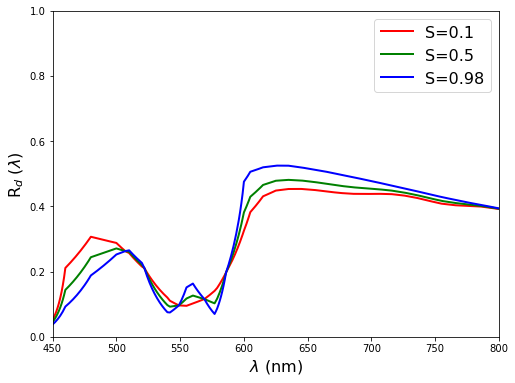

In [3]:
  # ######################################################################## 
#  El programa representa la reflectancia difusa a partir de la 
# expresión predicha por la teoría de la difusión
#--------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#-------------------------------------------------------------------------- A=np.loadtxt('mua_Agua.dat') 
A=np.loadtxt('mua_Agua.dat')
landas_0 = A[:,0]
mua_Agua=A[:,1]
B=np.loadtxt('mua_Hemo.dat') 
#landas_0 = A[:,0]
mua_Hemo=B[:,1]
C=np.loadtxt('mua_Oxy.dat') 
#landas_0 = A[:,0]
mua_Oxy=C[:,1]
mua_Mel = 6.6e11*landas_0**(-3.33)
#-----------------------------------------------------
  
    
#---------------REFLECTANCIA DE LA DERMIS---------------------------------------

#------COEFICIENTE DE SCATTERING MIE+RAYLEIGH--------------------
mu500=45 # cm-1
fR=0.4
b= 0.89
musp = mu500*(fR*1/(landas_0/500)**4+ (1-fR)*1/(landas_0/500)**b)
#-----------------------------------------------------------------
 
#-----COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre------
fs=0.1
SS=[0.1, 0.5, 0.98] #valores posibles de S
fig = plt.figure(figsize=(8,6))
for j,S in enumerate(SS):
    fa=0.65 
    R0=0.02
    mua  = fs*(S*mua_Oxy + (1-S)*mua_Hemo) + fa*mua_Agua # ' 
    if (j==0): 
        color='r'
        l1='S='+ str(S)
    elif(j==1):  
        l2='S='+ str(S)
        color='g'
    else:
        l3='S='+ str(S)
        color='b'

#---------------------------------------------------------

#------------------------------------------------------
#   MODELO DE REFLECTANCIA DIFUSA
#------------------------------------------------------------------
    r=0.04  # separación netre las fibras
    zo = 1/(mua + musp)
    D = zo/3
    delta = np.sqrt(D/mua)
    r1 = np.sqrt(zo**2 + r**2)
    r2 = np.sqrt((zo + 4*D)**2 + r**2)
    mueff = 1/delta

    c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
    d = (zo + 4*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
    Rdifusa_teorica = R0*( c + d )/(4*np.pi)
#---------------------------------------------------------------
    plt.plot(landas_0,Rdifusa_teorica, color, linewidth=2 )
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('R$_d$ ($\lambda$)',fontsize=16)
plt.xlim(450,800)
plt.ylim(0,1)
plt.legend((l1,l2,l3),fontsize=16);

Al aumentar la fracción de oxihemoglobina, la reflectancia disminuye en los picos de absorción de la oxihemglobina tal como se puede deducir si observamos el coeficiente de absorción lineal de la oxihemoglobina. Apenas cambia la curva en el intervalo 650 nm- 800nm. Aquí, los cromóforos absorben poco.

###  Influencia del porcentage de scattering Rayleigh (f$_R$)

El siguiente código muestra los cambios en la reflectancia difusa para 3 valores del parámetro que determina el peso del scattering Rayleigh en el coeficiente de scattering $\mu_s'$

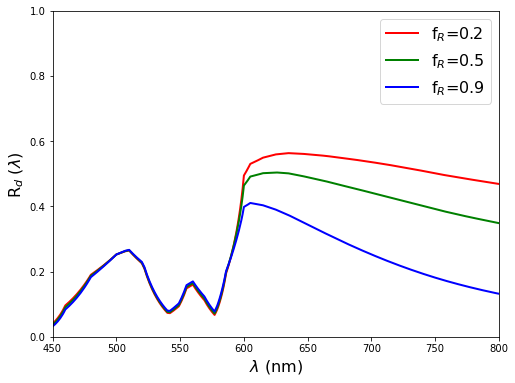

In [4]:
  # ######################################################################## 
#  El programa representa la reflectancia difusa a partir de la 
# expresión predicha por la teoría de la difusión
#--------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#-------------------------------------------------------------------------- A=np.loadtxt('mua_Agua.dat') 
A=np.loadtxt('mua_Agua.dat')
landas_0 = A[:,0]
mua_Agua=A[:,1]
B=np.loadtxt('mua_Hemo.dat') 
#landas_0 = A[:,0]
mua_Hemo=B[:,1]
C=np.loadtxt('mua_Oxy.dat') 
#landas_0 = A[:,0]
mua_Oxy=C[:,1]
mua_Mel = 6.6e11*landas_0**(-3.33)
#-----------------------------------------------------
  
    
#---------------REFLECTANCIA DE LA DERMIS---------------------------------------

#-----COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre------
fs=0.1
S=0.98
fa=0.65 
R0=0.02
mua  = fs*(S*mua_Oxy + (1-S)*mua_Hemo) + fa*mua_Agua # ' 

#------COEFICIENTE DE SCATTERING MIE+RAYLEIGH--------------------
fig = plt.figure(figsize=(8,6))
mu500=45 # cm-1
fRvec=[0.2,0.5,0.9]
b= 0.89
for j,fR in enumerate(fRvec):
    musp = mu500*(fR*1/(landas_0/500)**4+ (1-fR)*1/(landas_0/500)**b)
    if (j==0): 
        color='r'
        l1='f$_R$='+ str(fR)
    elif(j==1):  
        l2='f$_R$='+ str(fR)
        color='g'
    else:
        l3='f$_R$='+ str(fR)
        color='b'
 
#------------------------------------------------------
#   MODELO DE REFLECTANCIA DIFUSA
#------------------------------------------------------------------
    r=0.04  # separación netre las fibras
    zo = 1/(mua + musp)
    D = zo/3
    delta = np.sqrt(D/mua)
    r1 = np.sqrt(zo**2 + r**2)
    r2 = np.sqrt((zo + 4*D)**2 + r**2)
    mueff = 1/delta

    c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
    d = (zo + 4*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
    Rdifusa_teorica = R0*( c + d )/(4*np.pi)
#---------------------------------------------------------------
    plt.plot(landas_0,Rdifusa_teorica, color, linewidth=2 )
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('R$_d$ ($\lambda$)',fontsize=16)
plt.xlim(450,800)
plt.ylim(0,1)
plt.legend((l1,l2,l3),fontsize=16);

La zona entre 500-600 nm cambia poco, ya que los parámetros que contribuyen a la absorción se mantienen constantes. Sin embargo, en la zona 650-800 nm se puede observer que las curvas decrecen monótonicamente con la longitud de onda, indicando que se trata de la contribución al scattering, especialmente del scattering Rayleigh. Para valores pequeños de **fR** el scattering es de tipo Mie y la variación con L es muy suave, mientras que para valores de fR= 0.9, casi toda la contribución es de tipo Rayleigh y el decaimiento es muy abrupto, típicamente con 1/$\lambda^4$. Por otra parte, podemos concluir que a longitudes de onda largas, la contribución se debe a scattering Mie. Al aumentar este, aumenta la reflectancia.

### Influencia del porcentaje de sangre, (fs)

A continuación mantenemos todos los parámetros fijos salvo el porcentaje de sangre **fs**


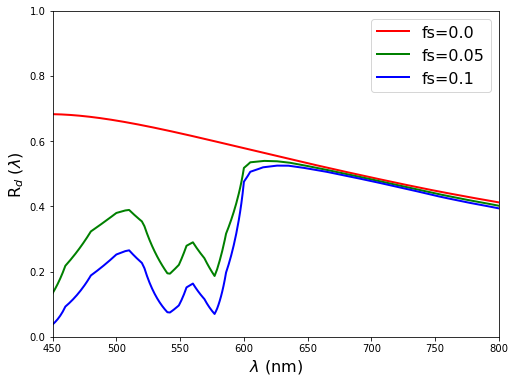

In [5]:
  # ######################################################################## 
#  El programa representa la reflectancia difusa a partir de la 
# expresión predicha por la teoría de la difusión
#--------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------#
# CARGA LOS ESPECTROS DE ARCHIVO DE SANGRE Y AGUA                         # 
#-------------------------------------------------------------------------- A=np.loadtxt('mua_Agua.dat') 
A=np.loadtxt('mua_Agua.dat')
landas_0 = A[:,0]
mua_Agua=A[:,1]
B=np.loadtxt('mua_Hemo.dat') 
#landas_0 = A[:,0]
mua_Hemo=B[:,1]
C=np.loadtxt('mua_Oxy.dat') 
#landas_0 = A[:,0]
mua_Oxy=C[:,1]
mua_Mel = 6.6e11*landas_0**(-3.33)
#-----------------------------------------------------
  
    
#---------------REFLECTANCIA DE LA DERMIS---------------------------------------

#------COEFICIENTE DE SCATTERING MIE+RAYLEIGH--------------------
mu500=45 # cm-1
fR=0.4
b= 0.89
musp = mu500*(fR*1/(landas_0/500)**4+ (1-fR)*1/(landas_0/500)**b)
#-----------------------------------------------------------------
 
#-----COEFICIENTE DE ABSORCIÓN TOTAL: Agua+Melanina+Sangre------
fsvec = [0.0,0.05,0.1] # valores posibles de fs
S=0.98
fig = plt.figure(figsize=(8,6))
for j,fs in enumerate(fsvec):
    fa=0.65 
    R0=0.02
    mua  = fs*(S*mua_Oxy + (1-S)*mua_Hemo) + fa*mua_Agua # ' 
    if (j==0): 
        color='r'
        l1='fs='+ str(fs)
    elif(j==1):  
        l2='fs='+ str(fs)
        color='g'
    else:
        l3='fs='+ str(fs)
        color='b'

#---------------------------------------------------------

#------------------------------------------------------
#   MODELO DE REFLECTANCIA DIFUSA
#------------------------------------------------------------------
    r=0.04  # separación netre las fibras
    zo = 1/(mua + musp)
    D = zo/3
    delta = np.sqrt(D/mua)
    r1 = np.sqrt(zo**2 + r**2)
    r2 = np.sqrt((zo + 4*D)**2 + r**2)
    mueff = 1/delta

    c = zo*(mueff + 1/r1)*np.exp(-r1/delta)/(r1**2)
    d = (zo + 4*D)*(mueff + 1/r2)*np.exp(-r2/delta)/(r2**2)
    Rdifusa_teorica = R0*( c + d )/(4*np.pi)
#---------------------------------------------------------------
    plt.plot(landas_0,Rdifusa_teorica, color, linewidth=2 )
plt.xlabel('$\lambda$ (nm)',fontsize=16)
plt.ylabel('R$_d$ ($\lambda$)',fontsize=16)
plt.xlim(450,800)
plt.ylim(0,1)
plt.legend((l1,l2,l3),fontsize=16);

En la zona entre 500-600 nm, al aumentar el volumen de sangre, aumenta la absorción y por lo tanto la reflectancia disminuye notablemente en dicha región espectral. Además como el parámetro de oxígeno en sangre S no cambia en los tres casos, los picos de la oxihemoglobina se mantienen. Por otra parte, el aumento del volumen de sangre no afecta al scattering, por lo que desde 650nm en adelante, domina el scattering y las tres curvas coinciden porque no se ha alterado ninguno de sus parámetros.